# HW Problem Set 2 Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Problem 5

In [2]:
# Define the complex function f_eps(z)
def f_eps(z, epsilon):
    return epsilon / (epsilon**2 + z**2)

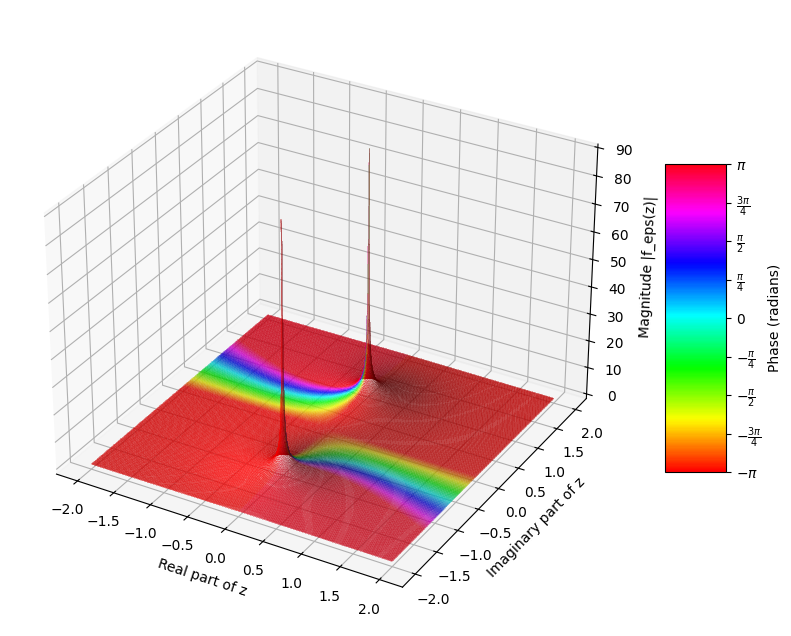

In [3]:
# Define the value of epsilon
epsilon = 1  # You can adjust this value
# cmap = plt.cm.twilight
# cmap = plt.cm.viridis
cmap = plt.cm.hsv

# Create a meshgrid of complex numbers in the complex plane
x = np.linspace(-2, 2, 400)  # Real part
y = np.linspace(-2, 2, 400)  # Imaginary part
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex plane

# Compute the function values on the grid
W = f_eps(Z, epsilon)

# Magnitude (for height) and phase (for color)
magnitude = np.abs(W)
phase = np.angle(W)

# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using magnitude as the z-axis
surf = ax.plot_surface(X, Y, magnitude, facecolors=cmap(phase), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

# Set axis labels
ax.set_xlabel('Real part of z')
ax.set_ylabel('Imaginary part of z')
ax.set_zlabel('Magnitude |f_eps(z)|')

# Add a color bar to map the color to the phase
# m = plt.cm.ScalarMappable(cmap=plt.cm.hsv)
# m.set_array(phase)
# plt.colorbar(m, shrink=0.5, aspect=5, label="Phase (radians)")
# Add a color bar to map the color to the phase
# Create a mappable object to generate the color bar
norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create mappable with norm
mappable.set_array(phase)  # Set the phase array

# Adding the color bar
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label="Phase (radians)")  # Use mappable to create color bar
cbar.set_ticks(
    np.arange(
        -np.pi,
        5*np.pi/4,
        np.pi/4
    )
)
cbar.set_ticklabels(
    [
        r"$-\pi$",
        r"$-\frac{3\pi}{4}$",
        r"$-\frac{\pi}{2}$",
        r"$-\frac{\pi}{4}$",
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$"
    ]
)


plt.show()


## Problem 6

In [4]:
def exp_z(z):
    return np.exp(z)

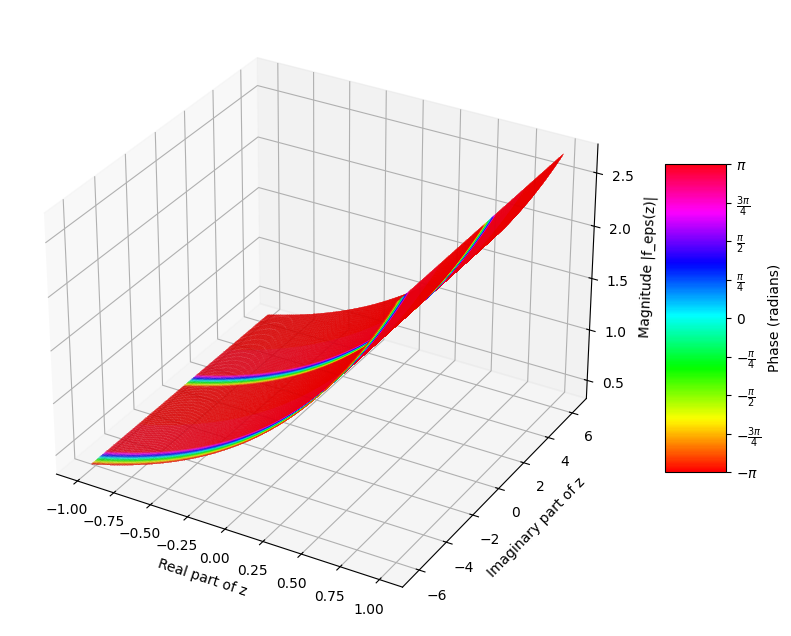

In [7]:
# Define the value of epsilon
# cmap = plt.cm.twilight
# cmap = plt.cm.viridis
cmap = plt.cm.hsv

# Create a meshgrid of complex numbers in the complex plane
x = np.linspace(-1, 1, 400)  # Real part
y = np.linspace(-2*np.pi, 2*np.pi, 400)  # Imaginary part
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex plane

# Compute the function values on the grid
W = exp_z(Z)

# Magnitude (for height) and phase (for color)
magnitude = np.abs(W)
phase = np.angle(W)

# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using magnitude as the z-axis
surf = ax.plot_surface(X, Y, magnitude, facecolors=cmap(phase), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

# Set axis labels
ax.set_xlabel('Real part of z')
ax.set_ylabel('Imaginary part of z')
ax.set_zlabel('Magnitude |f_eps(z)|')

# Add a color bar to map the color to the phase
# m = plt.cm.ScalarMappable(cmap=plt.cm.hsv)
# m.set_array(phase)
# plt.colorbar(m, shrink=0.5, aspect=5, label="Phase (radians)")
# Add a color bar to map the color to the phase
# Create a mappable object to generate the color bar
norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create mappable with norm
mappable.set_array(phase)  # Set the phase array

# Adding the color bar
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label="Phase (radians)")  # Use mappable to create color bar
cbar.set_ticks(
    np.arange(
        -np.pi,
        5*np.pi/4,
        np.pi/4
    )
)
cbar.set_ticklabels(
    [
        r"$-\pi$",
        r"$-\frac{3\pi}{4}$",
        r"$-\frac{\pi}{2}$",
        r"$-\frac{\pi}{4}$",
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$"
    ]
)


plt.show()
